#Ver se vou prosseguir com a análise por cabine ou não

#Ver se existe relação da localização das cabines e das classes com o acidente, e também com a localização dos portos

1. Importando bibliotecas 

In [59]:
import pandas as pd
import numpy as np
###GEMINI
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Importar numpy para o log da tarifa

# Define um tema e estilo padrão para os gráficos
sns.set_theme(style="whitegrid", palette="deep")
###GEMINI

1.1 Abrindo o CSV

In [60]:
df = pd.read_csv("titanic_cleaned.csv")

print(df[:20])

    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0             1         0       3    male  22.0      1      0   7.2500   
1             2         1       1  female  38.0      1      0  71.2833   
2             3         1       3  female  26.0      0      0   7.9250   
3             4         1       1  female  35.0      1      0  53.1000   
4             5         0       3    male  35.0      0      0   8.0500   
5             6         0       3    male  33.0      0      0   8.4583   
6             7         0       1    male  54.0      0      0  51.8625   
7             8         0       3    male   2.0      3      1  21.0750   
8             9         1       3  female  27.0      0      2  11.1333   
9            10         1       2  female  14.0      1      0  30.0708   
10           11         1       3  female   4.0      1      1  16.7000   
11           12         1       1  female  58.0      0      0  26.5500   
12           13         0       3    m

2. Estatísticas Descritivas

In [61]:
# Mostra as estatísticas de todas as colunas numéricas
# (Age, Fare, Pclass, Survived, etc.)
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.717363    0.523008   
std     257.353842    0.486592    0.836071   14.700650    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   39.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.910400    1.000000  
50%      0.000000   14.454200    1.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000

In [62]:
# 'include' força a descrição de colunas de texto/objeto
print(df.describe(include=['object', 'string']))

# Isso mostrará:
# count: contagem
# unique: quantos valores únicos existem (ex: 2 para 'Sex')
# top: qual é o valor mais comum (a 'moda') (ex: 'male' para 'Sex')
# freq: frequência do valor mais comum

         Sex    Cabin Embarked Title
count    891      891      891   891
unique     2      148        3     6
top     male  Unknown        S    Mr
freq     577      687      646   517


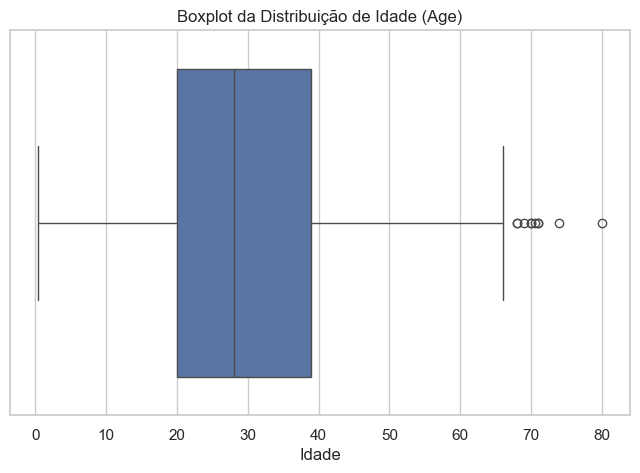

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot da Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.show()

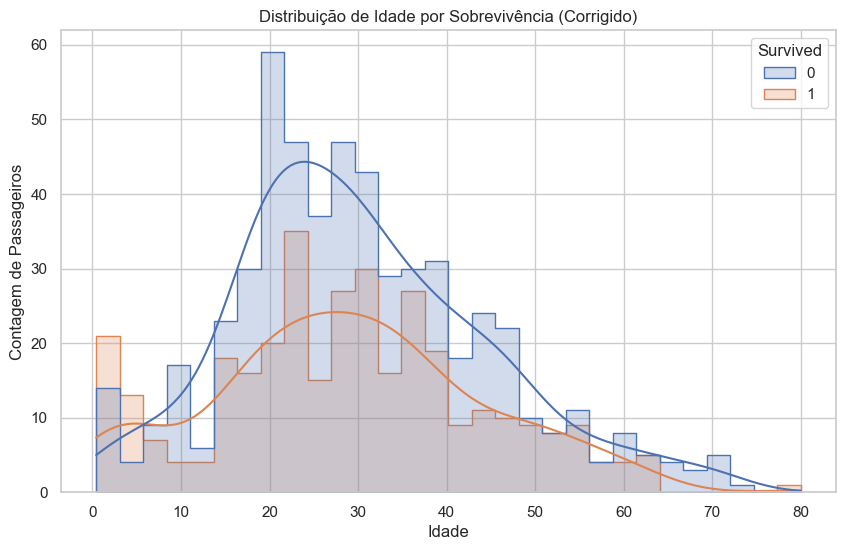

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x='Age', 
    hue='Survived',  # Isso JÁ cria a legenda
    kde=True,
    bins=30,
    element='step'
)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Contagem de Passageiros')
# SEM plt.legend()!
plt.show()

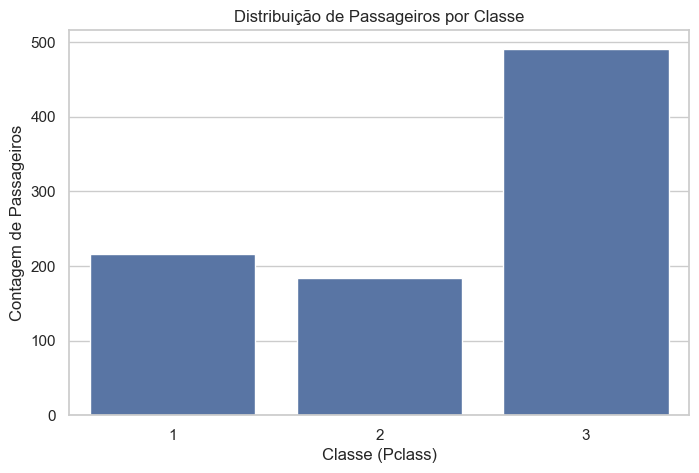

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)

plt.title('Distribuição de Passageiros por Classe')
plt.xlabel('Classe (Pclass)')
plt.ylabel('Contagem de Passageiros')
plt.show()

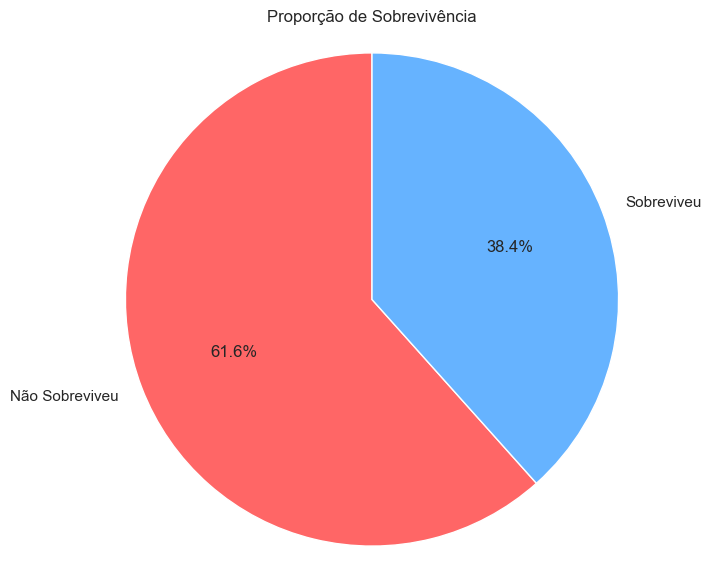

In [66]:
# Contamos os valores primeiro
contagem_sobrevivencia = df['Survived'].value_counts()

# Rótulos
labels = ['Não Sobreviveu', 'Sobreviveu']
# Cores
colors = ['#ff6666', '#66b3ff'] # Vermelho e Azul

plt.figure(figsize=(7, 7))
plt.pie(
    contagem_sobrevivencia, 
    labels=labels, 
    autopct='%1.1f%%', # Mostra a porcentagem
    colors=colors,
    startangle=90
)

plt.title('Proporção de Sobrevivência')
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.show()

In [ ]:
# 1. Separar os DataFrames
df_survived = df[df['Survived'] == 1]
df_not_survived = df[df['Survived'] == 0]

print("--- Perfil do SOBREVIVENTE 'Típico' ---")
print(f"  Total de Pessoas: {len(df_survived)}")
# .mode()[0] pega o valor mais frequente (a moda)
print(f"  Gênero Mais Comum: {df_survived['Sex'].mode()[0]}")
print(f"  Classe Mais Comum: {df_survived['Pclass'].mode()[0]}")
print(f"  Porto Mais Comum: {df_survived['Embarked'].mode()[0]}")
print(f"  Idade Mediana: {df_survived['Age'].median():.1f} anos") # Mediana é melhor que média para idades
print(f"  Tinha Cabine?: {df_survived['Cabin'].mode()[0]}") # Usando a coluna que criamos

print("\n--- Perfil do NÃO-SOBREVIVENTE 'Típico' ---")
print(f"  Total de Pessoas: {len(df_not_survived)}")
print(f"  Gênero Mais Comum: {df_not_survived['Sex'].mode()[0]}")
print(f"  Classe Mais Comum: {df_not_survived['Pclass'].mode()[0]}")
print(f"  Porto Mais Comum: {df_not_survived['Embarked'].mode()[0]}")
print(f"  Idade Mediana: {df_not_survived['Age'].median():.1f} anos")
print(f"  Tinha Cabine?: {df_not_survived['Cabin'].mode()[0]}")

--- Perfil do SOBREVIVENTE 'Típico' ---
  Total de Pessoas: 342
  Gênero Mais Comum: female
  Classe Mais Comum: 1
  Porto Mais Comum: S
  Idade Mediana: 24.0 anos
  Tinha Cabine?: Unknown

--- Perfil do NÃO-SOBREVIVENTE 'Típico' ---
  Total de Pessoas: 549
  Gênero Mais Comum: male
  Classe Mais Comum: 3
  Porto Mais Comum: S
  Idade Mediana: 21.0 anos
  Tinha Cabine?: Unknown


4. Matriz de correlação das variáveis

In [ ]:
df_corr = df.copy()

# Convertendo 'Sex' para numérico para incluir na matriz
df_corr['Sex_Num'] = df_corr['Sex'].map({'male': 0, 'female': 1})

# Selecionando apenas colunas numéricas relevantes
colunas_numericas = ['Survived', 'Pclass', 'Sex_Num', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare']
matriz_correlacao = df_corr[colunas_numericas].corr()

print("\nMatriz de Correlação:")
print(matriz_correlacao)

# A forma mais fácil de ler isso é olhando a linha 'Survived'
print("\nCorrelação com 'Survived':")
print(matriz_correlacao['Survived'].sort_values(ascending=False))


Matriz de Correlação:
            Survived    Pclass   Sex_Num       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.064910 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.339898  0.083081  0.018443   
Sex_Num     0.543351 -0.131900  1.000000 -0.081163  0.114631  0.245489   
Age        -0.064910 -0.339898 -0.081163  1.000000 -0.233296 -0.172482   
SibSp      -0.035322  0.083081  0.114631 -0.233296  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.172482  0.414838  1.000000   
FamilySize  0.016639  0.065997  0.200988 -0.245619  0.890712  0.783111   
Fare        0.257307 -0.549500  0.182333  0.096688  0.159651  0.216225   

            FamilySize      Fare  
Survived      0.016639  0.257307  
Pclass        0.065997 -0.549500  
Sex_Num       0.200988  0.182333  
Age          -0.245619  0.096688  
SibSp         0.890712  0.159651  
Parch         0.783111  0.216225  
FamilySize    1.000000  0.217138  
Fare          0.217138  1.0000

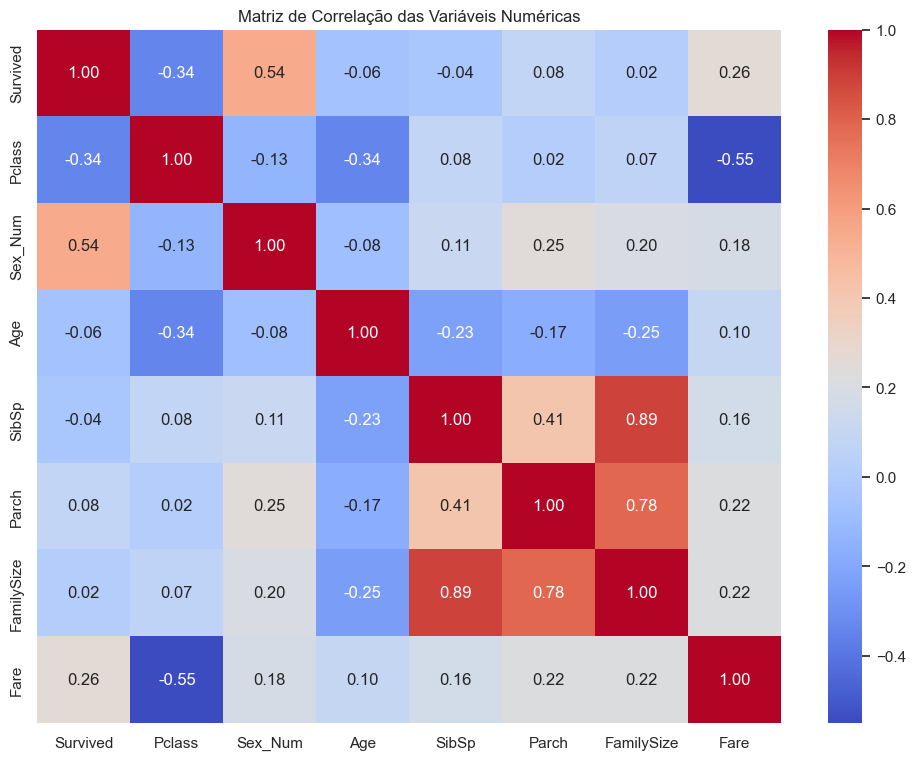

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(
    matriz_correlacao,
    annot=True,      # 'annot=True' escreve o valor numérico em cada célula
    cmap='coolwarm', # 'cmap' define o mapa de cores (azul=negativo, vermelho=positivo)
    fmt='.2f'        # 'fmt' formata os números para 2 casas decimais
)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

3. Análises de Taxa de Sobrevivência por grupos


3.1. Análise 1

In [ ]:
#Agrupando sobrevivência por classe econômica em que cada passageiro está
#Hipótese 1: Passageiros de classes melhores tem maior taxa de sobrevivência
df_tamanho = df.groupby('Pclass')['PassengerId'].count()
print(df_tamanho)

df_classes = df.groupby('Pclass')['Survived'].sum()
print(df_classes)

percentual = df_classes/df_tamanho
print(percentual)
#Hipótese comprovada!

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


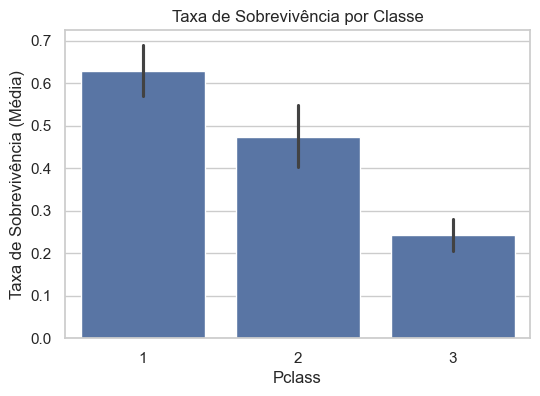

In [70]:
#Gráfico

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Classe')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

3.2 Análise 2

In [72]:
#Hipótese 2: Taxa de sobrevivência por idade (pessoas adultas tem mais chances de sobreviver)
# Definir os limites das faixas
df_copia = df.copy()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
# Definir os nomes para cada faixa (um a menos que os limites)
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
# right=False faz com que a faixa '10-20' inclua idades de 10 até 19.99...
df_copia['Faixa_Etaria'] = pd.cut(df_copia['Age'], bins=bins, labels=labels, right=False)
# Vamos ver a taxa de sobrevivência por faixa
taxa_sobrevivencia = df_copia.groupby('Faixa_Etaria')['Survived'].mean()

print(taxa_sobrevivencia)
#Detalhe, não tinha ninguém entre 70 e 80 anos, e só uma pessoa com mais de 80 anos.
#Hipótese negada> Crianças entre 0-10 anos e pessoas +80 tiveram maior taxas de sobrevivência

Faixa_Etaria
0-10     0.556962
10-20    0.358209
20-30    0.338462
30-40    0.403846
40-50    0.355932
50-60    0.448276
60-70    0.333333
70-80    0.000000
80+      1.000000
Name: Survived, dtype: float64


C:\Users\Henrique\AppData\Local\Temp\ipykernel_6212\548060595.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_sobrevivencia = df_copia.groupby('Faixa_Etaria')['Survived'].mean()


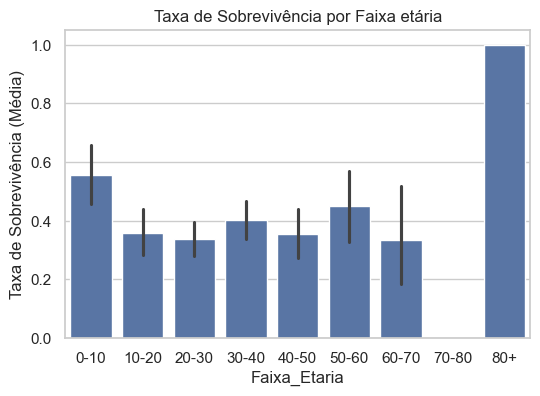

In [73]:
#Gráfico

plt.figure(figsize=(6, 4))
sns.barplot(x='Faixa_Etaria', y='Survived', data=df_copia)
plt.title('Taxa de Sobrevivência por Faixa etária')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

3.3 Análise 3

In [18]:
#Hipótese 3: Pessoas que não possuem irmãos, esposo/esposa, pais e filhos presentes (se tiver um desses já não entra no grupo) têm
#mais chances de sobreviverem
df_copia = df.copy()

df_sozinho = df_copia[df_copia['FamilySize']==1]

print("Média de sobrevivência de qm tava sozinho: ", df_sozinho['Survived'].mean())

df_acompanhado = df_copia[df_copia['FamilySize']!=1]
print("Média de sobrevivência de qm tava acompanhado: ", df_acompanhado['Survived'].mean())

#Hipótese negada

Média de sobrevivência de qm tava sozinho:  0.30353817504655495
Média de sobrevivência de qm tava acompanhado:  0.5056497175141242


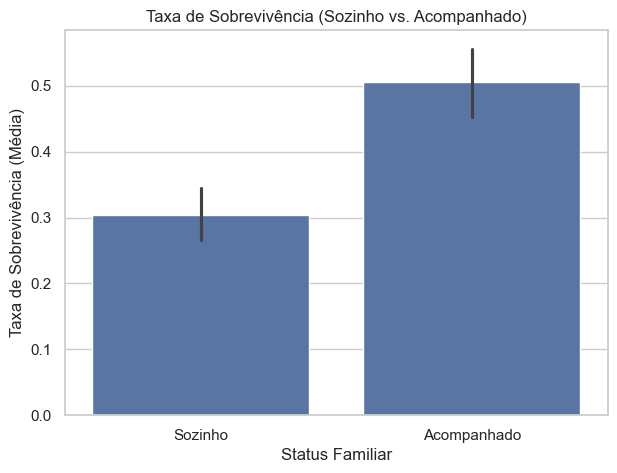

In [74]:
# 1. Crie uma cópia do DataFrame
df_copia_grafico = df.copy()

# 2. Crie a nova coluna 'Status_Familia'
# np.where(condição, valor_se_True, valor_se_False)
df_copia_grafico['Status_Familia'] = np.where(
    df_copia_grafico['FamilySize'] == 1, 
    'Sozinho', 
    'Acompanhado'
)

# 3. Agora podemos plotar!
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Status_Familia', 
    y='Survived', 
    data=df_copia_grafico,
    order=['Sozinho', 'Acompanhado'] # Garante a ordem no eixo X
)

plt.title('Taxa de Sobrevivência (Sozinho vs. Acompanhado)')
plt.xlabel('Status Familiar')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

Análise 3.4) Pessoas com títulos no nome tem maior taxa de sobrevivência

In [15]:
df_titulo = df.copy()

title_percentages = df['Title'].value_counts(dropna=False, normalize=True *100)
print(title_percentages)
df_titulo = df_titulo.groupby('Title')['Survived'].mean()
print(df_titulo)

Title
Mr         0.580247
Miss       0.206510
Mrs        0.142536
Master     0.044893
Officer    0.020202
Royalty    0.005612
Name: proportion, dtype: float64
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64


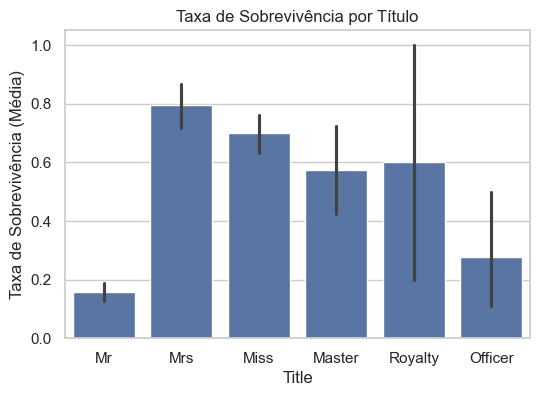

In [75]:
#Gráfico

plt.figure(figsize=(6, 4))
sns.barplot(x='Title', y='Survived', data=df_copia)
plt.title('Taxa de Sobrevivência por Título')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

Análise 3.5) (Gemini) Análise por gênero - Sex

In [ ]:
# Taxa de sobrevivência por gênero
taxa_sobrevivencia_genero = df.groupby('Sex')['Survived'].mean()
print("Taxa de sobrevivência por gênero:")
print(taxa_sobrevivencia_genero)

#Contagem absoluta
print("\nContagem de sobrevivência por gênero:")
print(pd.crosstab(df['Sex'], df['Survived']))

Taxa de sobrevivência por gênero:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Contagem de sobrevivência por gênero:
Survived    0    1
Sex               
female     81  233
male      468  109


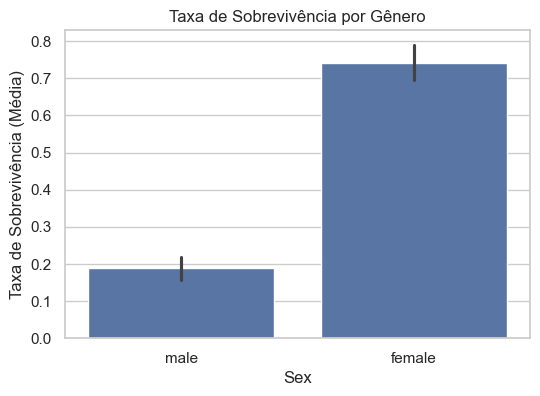

In [29]:
#Gráfico

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Gênero')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

Análise 3.6) (Gemini) Análise por classe e gênero

In [20]:
# Agrupando por Classe e Gênero
taxa_sobrevivencia_classe_genero = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("Taxa de sobrevivência por Classe e Gênero:")
print(taxa_sobrevivencia_classe_genero)

# Pode ser útil visualizar isso como uma tabela dinâmica (pivot table)
print("\nTabela Cruzada (Pclass vs Sex):")
print(df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean'))

Taxa de sobrevivência por Classe e Gênero:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

Tabela Cruzada (Pclass vs Sex):
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


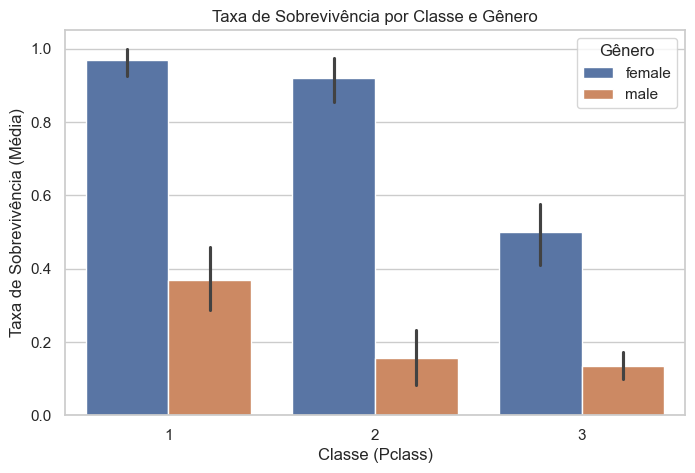

In [30]:
#Gráfico

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Taxa de Sobrevivência por Classe e Gênero')
plt.xlabel('Classe (Pclass)')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.legend(title='Gênero')
plt.show()

Análise 3.7) (Gemini) Análise com FamilySize maior

In [21]:
# Criando categorias para Tamanho da Família
def categorizar_familia(size):
    if size == 1:
        return 'Sozinho'
    elif 2 <= size <= 4:
        return 'FamiliaPequena'
    else:
        return 'FamiliaGrande'

df_familia = df.copy()
df_familia['Tipo_Familia'] = df_familia['FamilySize'].apply(categorizar_familia)

# Verificando a taxa de sobrevivência
taxa_sobrevivencia_tipo_familia = df_familia.groupby('Tipo_Familia')['Survived'].mean()
print("Taxa de sobrevivência por Tipo de Família:")
print(taxa_sobrevivencia_tipo_familia.reindex(['Sozinho', 'FamiliaPequena', 'FamiliaGrande']))

Taxa de sobrevivência por Tipo de Família:
Tipo_Familia
Sozinho           0.303538
FamiliaPequena    0.578767
FamiliaGrande     0.161290
Name: Survived, dtype: float64


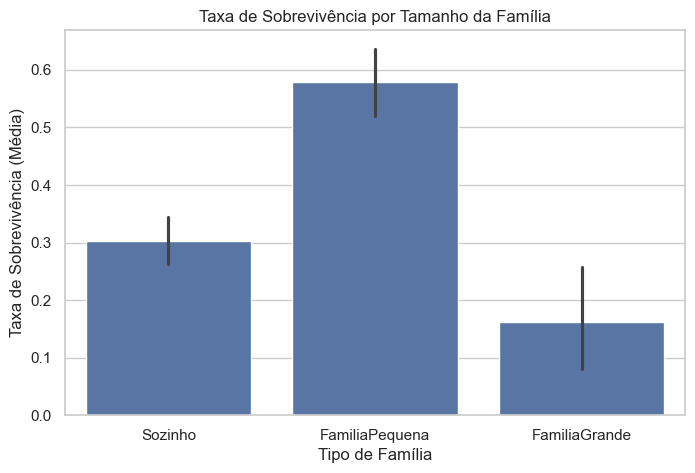

In [31]:
#Gráfico

plt.figure(figsize=(8, 5))
# Usamos 'order' para garantir a ordem lógica no eixo x
ordem = ['Sozinho', 'FamiliaPequena', 'FamiliaGrande']
sns.barplot(x='Tipo_Familia', y='Survived', data=df_familia, order=ordem)

plt.title('Taxa de Sobrevivência por Tamanho da Família')
plt.xlabel('Tipo de Família')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

Análise 3.8)(Gemini) Análise de Tarifa

In [22]:
df_tarifa = df.copy()

# Dividindo a Tarifa em 4 grupos (Quartis)
df_tarifa['Faixa_Tarifa'] = pd.qcut(df_tarifa['Fare'], q=4, labels=['Q1 (Mais Baixa)', 'Q2', 'Q3', 'Q4 (Mais Alta)'])

taxa_sobrevivencia_tarifa = df_tarifa.groupby('Faixa_Tarifa')['Survived'].mean()
print("Taxa de sobrevivência por Faixa de Tarifa (Quartis):")
print(taxa_sobrevivencia_tarifa)

Taxa de sobrevivência por Faixa de Tarifa (Quartis):
Faixa_Tarifa
Q1 (Mais Baixa)    0.197309
Q2                 0.303571
Q3                 0.454955
Q4 (Mais Alta)     0.581081
Name: Survived, dtype: float64


C:\Users\Henrique\AppData\Local\Temp\ipykernel_6212\2555564621.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_sobrevivencia_tarifa = df_tarifa.groupby('Faixa_Tarifa')['Survived'].mean()


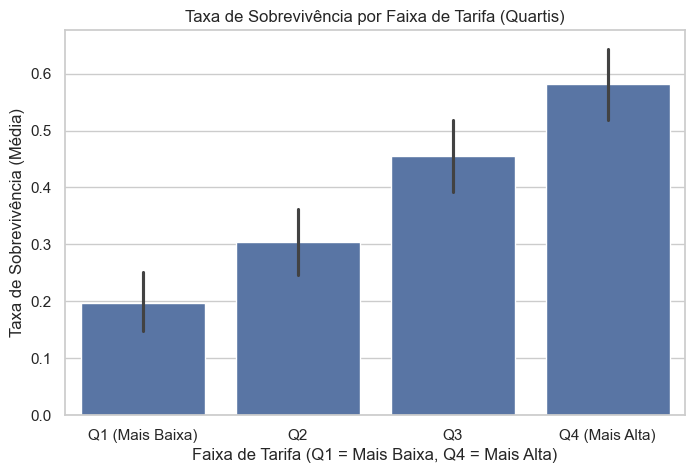

In [32]:
#Gráfico

plt.figure(figsize=(8, 5))
sns.barplot(x='Faixa_Tarifa', y='Survived', data=df_tarifa)
plt.title('Taxa de Sobrevivência por Faixa de Tarifa (Quartis)')
plt.xlabel('Faixa de Tarifa (Q1 = Mais Baixa, Q4 = Mais Alta)')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

C:\Users\Henrique\AppData\Local\Temp\ipykernel_6212\2355105297.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Fare_log', hue='Survived', shade=True, common_norm=False)


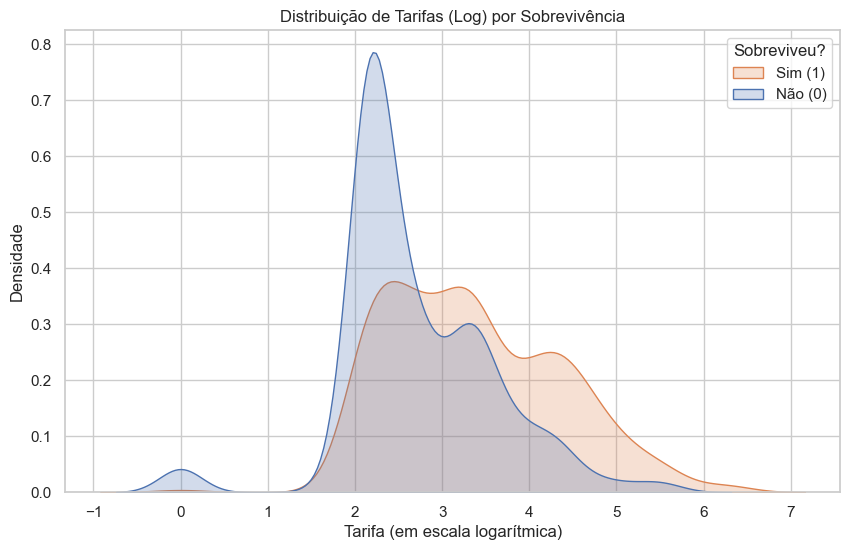

In [ ]:
#Gráfico distribuição completa

# Aplicamos log(x+1) para 'achatar' a distribuição, 
# já que a maioria das tarifas é baixa e poucas são altíssimas.
df['Fare_log'] = np.log1p(df['Fare'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Fare_log', hue='Survived', shade=True, common_norm=False)
plt.title('Distribuição de Tarifas (Log) por Sobrevivência')
plt.xlabel('Tarifa (em escala logarítmica)')
plt.ylabel('Densidade')
plt.legend(title='Sobreviveu?', labels=['Sim (1)', 'Não (0)'])
plt.show()


'''
O que ele faz: Em vez de agrupar em faixas, o kdeplot desenha uma curva suave que mostra a "forma" da distribuição dos dados.

Como ele funciona: Usar hue='Survived' desenha duas curvas separadas. Podemos ver claramente que a curva dos não-sobreviventes (0) tem seu pico em tarifas mais baixas, enquanto a curva dos sobreviventes (1) é mais alta em tarifas maiores.
'''

Análise 3.9) (Gemini) Análise do porto de embarque

In [23]:
# Taxa de sobrevivência por Porto de Embarque
taxa_sobrevivencia_embarque = df.groupby('Embarked')['Survived'].mean()
print("Taxa de sobrevivência por Porto de Embarque:")
print(taxa_sobrevivencia_embarque)

# Para confirmar se isso é por causa da Pclass, veja a distribuição de classes por porto
print("\nDistribuição de Classes por Porto de Embarque:")
print(pd.crosstab(df['Embarked'], df['Pclass']))

Taxa de sobrevivência por Porto de Embarque:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Distribuição de Classes por Porto de Embarque:
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         129  164  353


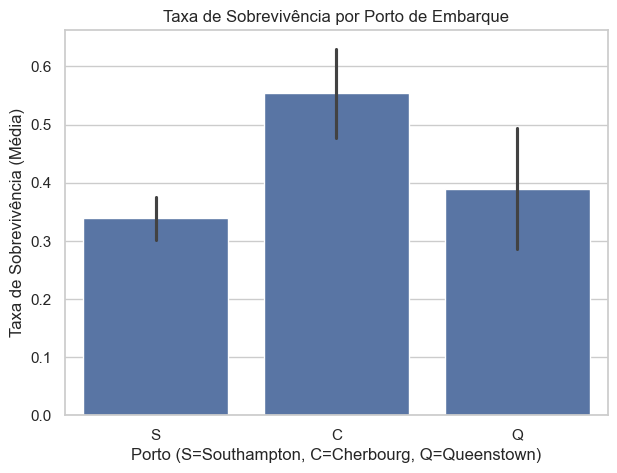

In [34]:
#Gráfico

plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=df, order=['S', 'C', 'Q'])
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()

Análise 3.10) (Gemini) Análise de Cabine

In [44]:
df_cabine = df.copy()

# 1. Análise: Ter ou não ter cabine registrada
# df_cabine['Tem_Cabine'] = df_cabine['Cabin'].notna()

# Análise corrigida (Coluna Unknown ao invés de na)
df_cabine['Tem_Cabine'] = (df_cabine['Cabin']!="Unknown")


taxa_sobrevivencia_tem_cabine = df_cabine.groupby('Tem_Cabine')['Survived'].mean()
print("Taxa de sobrevivência (False = Sem registro, True = Com registro):")
print(taxa_sobrevivencia_tem_cabine)

# 2. Análise (Mais avançada): Sobrevivência pelo Deck (primeira letra da cabine)
# Ignora cabines nulas primeiro
df_cabine_com_deck = df_cabine.dropna(subset=['Cabin'])
df_cabine_com_deck['Deck'] = df_cabine_com_deck['Cabin'].str[0]

taxa_sobrevivencia_deck = df_cabine_com_deck.groupby('Deck')['Survived'].mean()
print("\nTaxa de sobrevivência por Deck (para quem tinha cabine):")
print(taxa_sobrevivencia_deck.sort_values(ascending=False))

Taxa de sobrevivência (False = Sem registro, True = Com registro):
Tem_Cabine
False    0.299854
True     0.666667
Name: Survived, dtype: float64

Taxa de sobrevivência por Deck (para quem tinha cabine):
Deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
U    0.299854
T    0.000000
Name: Survived, dtype: float64


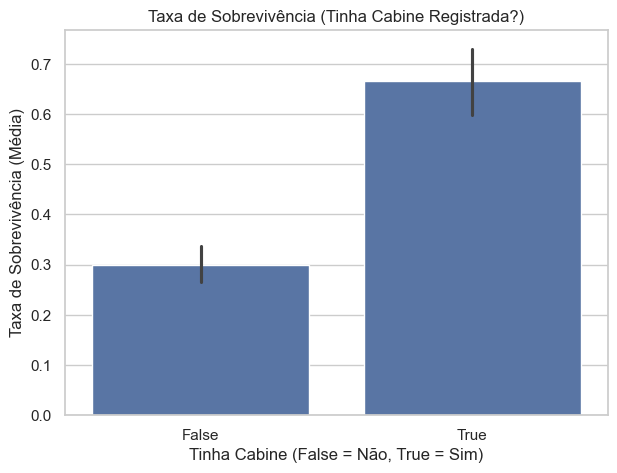

In [47]:
# Gráfico)
plt.figure(figsize=(7, 5))
sns.barplot(x='Tem_Cabine', y='Survived', data=df_cabine)

plt.title('Taxa de Sobrevivência (Tinha Cabine Registrada?)')
plt.xlabel('Tinha Cabine (False = Não, True = Sim)')
plt.ylabel('Taxa de Sobrevivência (Média)')
plt.show()